In [1]:
from IPython.core.display import HTML
HTML("<style>.container { width:95% !important; }</style>")

# Lecture 2: What is an optimization problem and how to solve them?

# What is an optimization problem?

A general mathematical formulation for **the optimization problems studied on this course** is
$$
\begin{align} \
\min \quad &f(x)\\
\text{s.t.} \quad & g_j(x) \geq 0\text{ for all }j=1,\ldots,J\\
& h_k(x) = 0\text{ for all }k=1,\ldots,K\\
&x\in \mathbb R^n.
\end{align}
$$

The above problem can be expressed as 
>Find an $x\in \mathbb R^n$ such that $g_j(x)\geq 0$ for all $j=1,\ldots,J$ and $h_k(x)=0$ for all $k=1,\ldots,K$, and there does not exist $x'\in \mathbb R^n$ such that $f(x')<f(x)$ and $g_j(x')\geq 0$ for all $j=1,\ldots,J$, $h_k(x')=0$ for all $k=1,\ldots,K$.

* **Note:** Solutions of the optimization problems $ max f(x) $ and $ min -f(x) $ are the same.

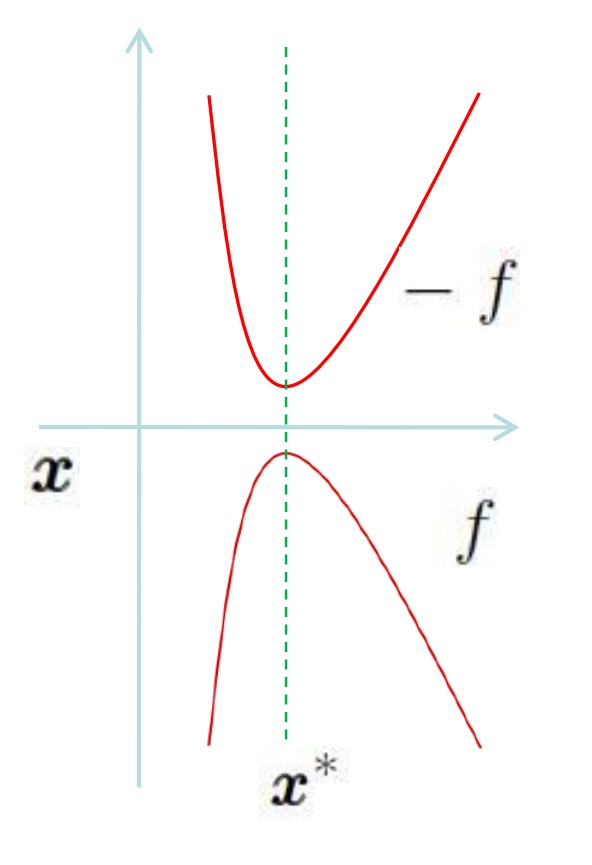

In [1]:
# insert image
from IPython.display import Image
Image(filename = "Images\MaxEqMin.jpg", width = 200, height = 300)

There are three main components to an optimization problem:
* the variables $x$ are called the **decision variables** (e.g., how many shares to buy from each stock in an individual financing known as portfolio selection problem),
* the equalities $h_k(x)=0$ and inequalities $g_j(x)\geq 0$ are called the **constraints** (e.g., budget limitations, capacity, etc.),
* the funtion $f(x)$ is called the **objective function** (e.g., min risk, max profit, etc.).

A vector of decision variables $x^*=(x^*_1,\dots,x^*_n)^T$ is called **a solution** and it is
* **feasible** if $g_j(x^*)\geq 0$ for all $j=1,\ldots,J$ and $h_k(x^*)=0$ for all $k=1,\ldots,K$,
* **feasible region** includes all feasible solutions (constructed by constraints),
* **locally optimal** if $x^*$ is feasible and there exists $r>0$ such that there does not exist a feasible solution $x'\in \operatorname{B}(x^*,r)$ such that $f(x')<f(x^*)$, and
* **(globally) optimal** if $x^*$ is feasible and there does not exist a feasible solution $x'$ such that $f(x')<f(x^*)$.


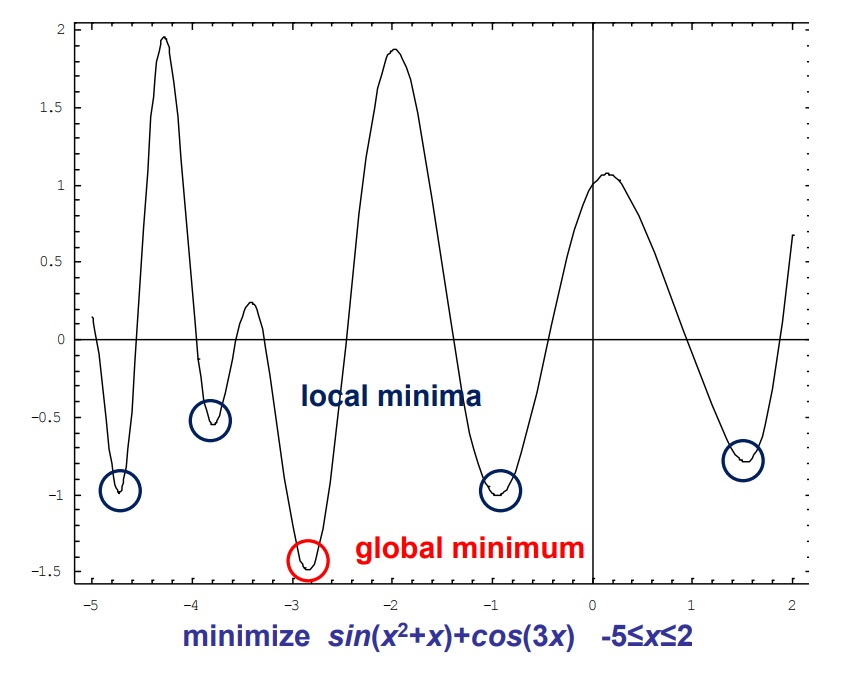

In [2]:
Image(filename = "Images\LocalVsGlobal2D.jpg", width = 400, height = 300)

The optimization problem is called
* **linear** if the objective function and the constraint functions of the problem are affinely linear (an affine function in 1D is: y = Ax + c.),
* **nonlinear** if the objective function or any of the constraint functions is nonlinear,
* **multimodal/unimodal** if the problem has/does not have more than one local optimum,
* **convex/nonconvex** if the objective and the constraint functions are that,
* **continuous/differentiable/twice-differentiable, etc** if the objective and the constraint functions are that.

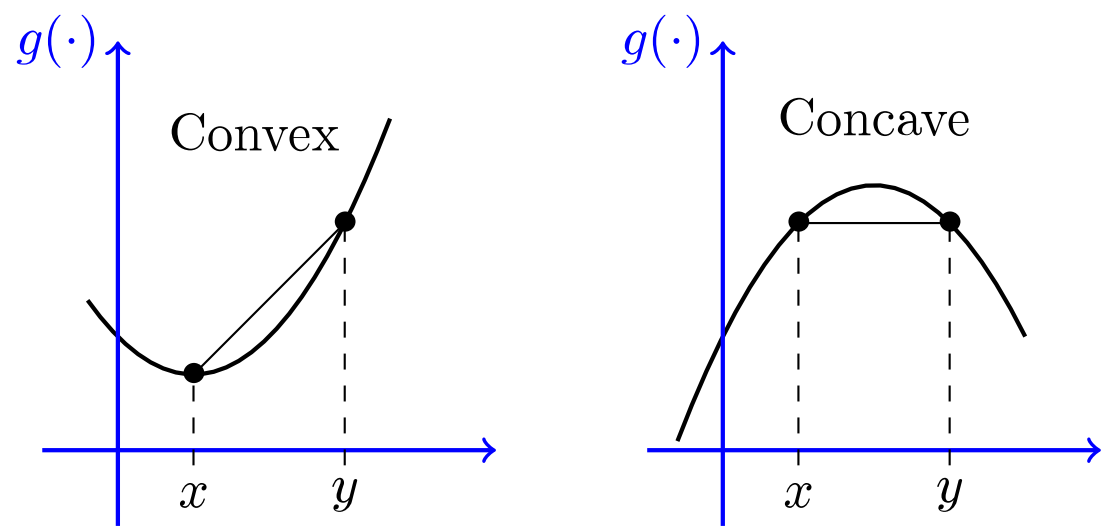

In [21]:
Image(filename = "Images\Convex.png", width = 600, height = 600)

## Why do we study optimization problems? 

Because optimization problems arise in various fields like engineering, finance, medicine etc.

### Example: Mixing problem
A refinery produces 3 types of gasoline by mixing 3 different crude oil. Each crude oil can be purchased maximum of 5000 barrels per day. Let us assume that octane values and lead concentrations behave linearly in mixing. Refining costs are 4 euros per barrel and the capacity of the refinery is 14000 barrels per day. Demand of gasoline can be increased by advertizing (demand grows 10 barrels per day for each euro used for advertizing). 

The details of the gasolines and crude oils can be found in the following tables:

|Data|Gasoline 1|Gasoline 2|Gasoline 3| 
|---|---|---|---|
|Sale price|70|60|50|
|Lower limit for octane|10|8|6|
|Upper limit for lead|0.01|0.02|0.01|
|Demand|3000|2000|1000|
|Refining cost|4|4|4|

|Data|Crude oil 1|Crude oil 2|Crude oil 3|
|---|---|---|---|
|Purchase price|45|35|25|
|Octane value|12|6|8|
|Lead concentration|0.005|0.02|0.03|
|Availability|5000|5000|5000|

**Task:** Determine the production quantities of each type of gasoline, mixing ratios of different crude oil and advertising budget so that the profit is maximized and the demand is met exactly.

#### Modelling mixing problem as an optimization problem:
decision variables:

* $x_{ij}$ = amount of crude oil $i$ used for producing gasoline $j$
* $y_j$ = the amount of money used for advertizing gasoline $j$

constraints:
* gasoline 1 demand: $x_{11}+x_{21}+x_{31}=3000+10y_1$
* gasoline 2 demand: $x_{12}+x_{22}+x_{32}=2000+10y_2$
* gasoline 3 demand: $x_{13}+x_{23}+x_{33}=1000+10y_3$

* crude oil 1 availability: $x_{11}+x_{12}+x_{13}\leq 5000$
* crude oil 2 availability: $x_{21}+x_{22}+x_{23}\leq 5000$
* crude oil 3 availability: $x_{31}+x_{32}+x_{33}\leq 5000$

* gasoline 1 octave value: $\frac{12x_{11}+6x_{21}+8x_{31}}{x_{11}+x_{21}+x_{31}}\geq 10$
* gasoline 2 octave value: $\frac{12x_{12}+6x_{22}+8x_{32}}{x_{12}+x_{22}+x_{32}}\geq 8$
* gasoline 3 octave value: $\frac{12x_{13}+6x_{23}+8x_{33}}{x_{13}+x_{23}+x_{33}}\geq 6$

* gasoline 1 lead value: $\frac{0.005x_{11}+0.02x_{21}+0.03x_{31}}{x_{11}+x_{21}+x_{31}}\leq 0.01$
* gasoline 2 lead value: $\frac{0.005x_{12}+0.02x_{22}+0.03x_{32}}{x_{12}+x_{22}+x_{32}}\leq 0.02$
* gasoline 3 lead value: $\frac{0.005x_{13}+0.02x_{23}+0.03x_{33}}{x_{13}+x_{23}+x_{33}}\leq 0.01$

objective function:

$$
\text{Profit} (x,y) = 70(x_{11}+x_{21}+x_{31})+60(x_{12}+x_{22}+x_{32})+50(x_{13}+x_{23}+x_{33})\\
             - 45(x_{11}+x_{12}+x_{13})-35(x_{21}+x_{22}+x_{23})-25(x_{31}+x_{32}+x_{33})\\
             - 4(x_{11}+x_{12}+x_{13})-4(x_{21}+x_{22}+x_{23})-4(x_{31}+x_{32}+x_{33})\\
             - y_1 - y_2 - y_3
$$

## More examples
* You can find more examples of optimization problems and their implimentations in Python here:

* <a href="http://ibmdecisionoptimization.github.io/docplex-doc/mp/samples.html">Examples of mathematical programming </a><br>

# How to solve optimization problems?

## Iterative vs. non-iterative methods

Optimal solutions to some optimization problems can be found by defining an explicit formula for it. For example, if the objective function is twice continuously differentiable and there are no constraints, the optimal solution (if exists) can be found by calculating all the zero-points of the gradient and finding the best one of those. In this kinds of cases, the optimization problem **can be solved using non-iterative methods.**

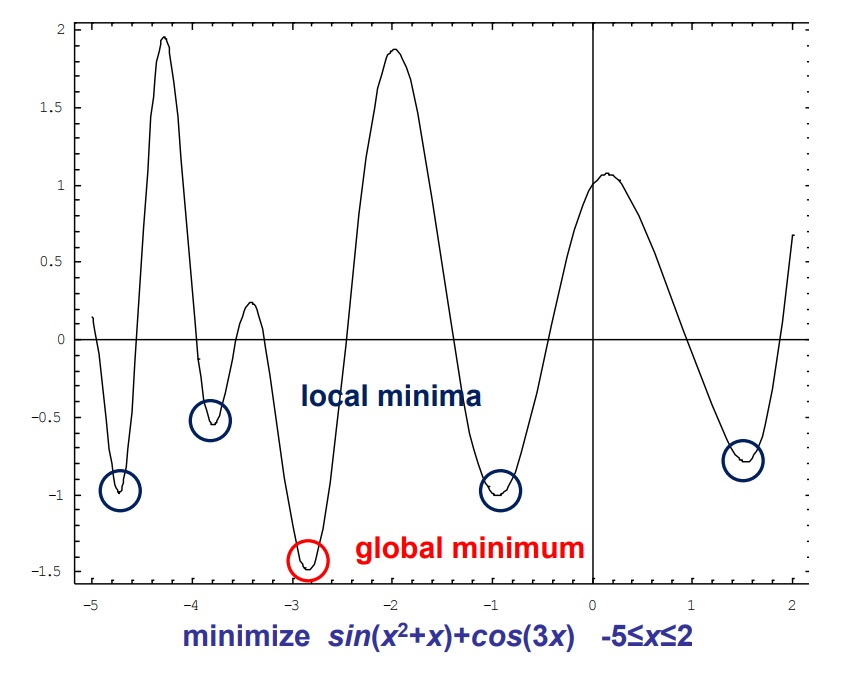

In [11]:
Image(filename = "Images\LocalVsGlobal2D.jpg", width = 400, height = 300)


**In this course we concentrate on the iterative methods.** Iterative methods are needed, if the problem has constraints, or the problem is in some other way not-well behaved (to be defined later, depending on the context). In iterative methods, solving the optimization problem starts from a so-called starting solution and then tries to improve the solution iteratively. The optimization algorithm chooses how the solution is changed at each iteration.

## What kind of methods will you learn in this course?
Different optimization problems require different methods. In this course, we study optimization problems, which are
* nonlinear
* not hugely multimodal

Often the methods cannot guarantee a (global) optimum, but instead **we need to satisfy ourselves with a local optimum**. In addition, it is usually not possible to find the actual optimal solution since numerical methods are used, but instead **an approximation of the optimal solution**. A feasible solution $x^*$ is called an approximation of a local optimum $x^{**}$ with quality $L>0$, when $\|x^*-x^{**}\|\leq L$.


# Line search

Let us study optimization problem $\min_{x\in[a,b]} f(x)$, where $a,b\in\mathbb R$. Let us try to find an approximation of a local optimum to this problem. 

Note: We have to assume that $f$ is *unimodal* in $[a,b]$, i.e. there exists a point $c\in (a,b)$ such that $f$ is strictly decreasing in $[a,c)$ and strictly increasing in $(c,b]$  

In [1]:
#Example objective function
def f(x):
    return 2+(1-x)**2

In [2]:
print("The value of the objective function at 3 is " + str(f(3)))

The value of the objective function at 3 is 6


## Line search with fixed steps
**input:** the quality $L>0$ of the approximation of the local optimum.  
**output:** an approximation of the local optimum with quality $L$.
```
start with x as the start point of the interval
loop until stops:
    if the value of the objective is increasing for x+L from x
        stop, because the approximation of the locally optimal solution is x 
    increase x by L
```

In [5]:
def fixed_steps_line_search(a,b,f,L):
    x = a
    while f(x)>f(x+L) and x+L<b: # Stopping criteria
        x = x+L
    return x

In [6]:
x = fixed_steps_line_search(0,3,f,1e-3); print("optimum is "+str(x)+", function value is " +str(f(x)))  # f(x) = 2+(1-x)**2

optimum is 1.0000000000000007, function value is 2.0


In [7]:
%timeit fixed_steps_line_search(0.0,3.0,f,1e-3)

795 µs ± 112 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


**Find out (from Python documentation/google) what function *timeit* does.**

## The method of bisection
**input:** the quality $L>0$ of the approximation of the local optimum.  
**output:** an approximation of the local optimum with quality $L$.
```
Set x as the start point of interval and y as the end point
while y-x>2*L:
    if the function is increasing at the mid point between x and y:
        set y as the midpoint between y and x, because a local optimum is before the midpoint
    otherwise:
        set x as the midpoint, because a local optimum is after the midpoint
return midpoint between x and y
```

The following function is completed live in class as an exercise. **Try to do it yourself before checking an answer below!** Follow the pseudo code given in the above cell.

This is what we should end up. The following function is not shown on the slides.

In [22]:
def bisection_line_search(a,b,f,L,epsilon): 
    x = a
    y = b
    while y-x>2*L:
        c = (x+y)/2
        if f(c+epsilon) > f(c-epsilon):
            y = c+epsilon
        else:
            x = c-epsilon
    return (x+y)/2
        

In [23]:
x = bisection_line_search(0.0,3.0,f,0.001,1e-5); print("optimum is "+str(x)+", function value is " +str(f(x)))

optimum is 0.9997591943359379, function value is 2.000000057987368


In [11]:
%timeit bisection_line_search(0.0,3.0,f,1e-3,1e-4)

9.98 µs ± 849 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


What is the role of $\epsilon$ in the bisection_line_search above?

## Golden section search (known also as Fibonacci search)

### Golden section 

Let $a<c<b$ be such that $\frac{b-a}{c-a}=\frac{c-a}{b-c}$. Then it is said that the point $c$ devides interval $[a,b]$ in the ratio of golden section (from the left, mirror from the right). Note that $c=a+\frac{\sqrt{5}-1}2(b-a)\approx a+0.618(b-a)$.

![alt text](images/golden_section.png "Golden section")

There is a theorem that if $a<c<d<b$ and both points $c$ and $d$ divide the interval $[a,b]$ in the ratio of golden section (from right and left), then the point $c$ divides the interval $[a,d]$ in the ratio of golden section from the left.

![alt text](images/golden_section2.svg "Golden section from the left and right")



### Golden section search algorithm


**input:** the quality $L>0$ of the approximation of the local optimum.  
**output:** an approximation of the local optimum with quality $L$.
```
Set x as the start point of interval and y as the end point
while y-x>2*L:
    Divide the interval [x,y] in the golden section from the left and right and attain two division points
    If the greater of the division points has a greater function value 
        set y as the rightmost division point, because a local optimum is before that
    otherwise:
        set x as the leftmost division point, because a local optimum is after that
return midpoint between x and y
```

The following function is completed in class as an exercise. **Try to do it yourself before checking an answer below!** Follow the pseudo code given in the above cell.

In [15]:
import math
def golden_section_line_search(a,b,f,L):
    x = a
    y = b
    while y-x>2*L:
        gr = (math.sqrt(5)-1)/2
        d = x + gr*(y-x)
        c = y - gr*(y-x)
        if f(d)>f(c):
            y = d
        else:
            x = c
    return (x+y)/2


In [16]:
x = golden_section_line_search(0.0,3.0,f,0.0001); print("optimum is "+str(x)+", function value is " +str(f(x)))

optimum is 0.999966946519324, function value is 2.0000000010925327


In [17]:
%timeit golden_section_line_search(0.0,3.0,f,1e-3)

17.9 µs ± 2.01 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


**What can you conclude from the execution times for the three different methods?**